In [16]:
from irtysh_functions import *
from angdist import *

In [17]:
def plotdensity(PX,PY,Z2,t):
    plt.pcolormesh(PX,PY,Z2,vmax=4.5,shading='auto')
    ax.set_aspect('equal')
    plt.colorbar(shrink=0.5)
    plt.title(t)

In [18]:
# z = np.polyfit(np.log10(img['z']), std,3)
z = [1,2,4,9] 
# p = np.poly1d(z)

N=len(z)

#Constants
c = 2.9979e10 #speed of light
G = 6.6726e-8 #Gravitational constant in cgs
m_sol = 1.989e33 #Solar mass in grams
rad_arcs = 206264.806 #Conversion factor for going from radians to arcseconds

# Define cosmology.
cosmo = constants(0.3, 0.7, 70)

#Check Curvature is near zero
print ("Omega_k: ", cosmo.omega_k)

# Define redshifts
z_o = 0.0  # observer redshift
z_l = 0.4  # lens redshift for Abell 2744

# Initialize angular diameter arrays
d_ol = np.zeros(N)
d_ls = np.zeros(N)
d_os = np.zeros(N)
scrit = np.zeros(N)

d_c, d_M, d_A = 0.0, 0.0, 0.0  # Initialize distances
dist = distances()  # create cosmology.distance instance

# For loop over images to calculate the angular diameter distances and critical surface densities.
for i in range(N):
    z_s = z[i]

    # Calculate the observer to lens ang dist.
    d_c = dist.codist(z_o, z_l, cosmo)
    dco=d_c
    d_M = dist.tcodist(z_o, z_l, d_c, cosmo)
    d_A = dist.angdist(d_M, z_l, d_A)

    d_ol[i] = d_A * 3.08567758e24  # Convert from Mpc to cm

    # Calculate the lens to source ang dist.
    d_c = dist.codist(z_l, z_s, cosmo)
    d_M = dist.tcodist(z_l, z_s, d_c, cosmo)
    d_A = dist.angdist(d_M, z_s, d_A)

    d_ls[i] = d_A * 3.08567758e24  # Convert from Mpc to cm

    # Calculate the observer to source ang dist.
    d_c = dist.codist(z_o, z_s, cosmo)
    d_M = dist.tcodist(z_o, z_s, d_c, cosmo)
    d_A = dist.angdist(d_M, z_s, d_A)

    d_os[i] = d_A * 3.08567758e24  # Convert from Mpc to cm

    #Calculate critical surface density
    scrit[i] = c**2/(4*np.pi*G)*d_os[i]/d_ol[i]/d_ls[i]
    
# print(scrit,z,d_ol)
print(scrit)

Omega_k:  5.551115123125783e-17
[0.59095647 0.44746103 0.39998004 0.37692711]


In [19]:
tag, x, y, b = np.loadtxt('/Users/agnivaghosh/Downloads/Lensing/graleruns/Irtysh/data_Irtysh/IrtyshI/parameters/lenses_IrtyshI.dat',unpack=True)

q = np.full(len(x), 1.0)
s = np.full(len(x),3.0)
K2 = np.zeros(len(x))
alpha = np.full(len(x),0.45)

alpha[0]=alpha[1]=0.5
K2[0]=0.35
K2[1]=-0.25

In [20]:
px = np.linspace(-75,75,451)
py = np.linspace(-75,75,451)

In [21]:
kappa = np.zeros([len(px),len(py)])
gamma1 = np.zeros([len(px),len(py)])
gamma2 = np.zeros([len(px),len(py)])

lens = Irtysh()

for i in range(len(px)):
    for j in range(len(py)):
        kappa[i][j] = 0.5*np.sum(lens.gradxx(x-px[i],y-py[j],b,alpha,s,q,K2)+lens.gradyy(x-px[i],y-py[j],b,alpha,s,q,K2))
        gamma1[i][j] = 0.5*np.sum(lens.gradxx(x-px[i],y-py[j],b,alpha,s,q,K2)-lens.gradyy(x-px[i],y-py[j],b,alpha,s,q,K2))
        gamma2[i][j] = np.sum(lens.gradxy(x-px[i],y-py[j],b,alpha,s,q,K2))
        


In [22]:
gamma=(gamma1*gamma1+gamma2*gamma2)**0.5
scale=0.313924/scrit[0]
mu1=((1-scale*kappa+scale*gamma)*(1-scale*kappa-scale*gamma))**(-1)
scale=0.313924/scrit[1]
mu2=((1-scale*kappa+scale*gamma)*(1-scale*kappa-scale*gamma))**(-1)
scale=0.313924/scrit[2]
mu4=((1-scale*kappa+scale*gamma)*(1-scale*kappa-scale*gamma))**(-1)
scale=0.313924/scrit[3]
mu9=((1-scale*kappa+scale*gamma)*(1-scale*kappa-scale*gamma))**(-1)


logmu1=np.log10(abs(mu1))
logmu2=np.log10(abs(mu2))
logmu4=np.log10(abs(mu4))
logmu9=np.log10(abs(mu9))

In [23]:
PX, PY = np.meshgrid(px,py)
Z1 = logmu1.reshape(len(px),len(py))
Z2 = logmu2.reshape(len(px),len(py))
Z4 = logmu4.reshape(len(px),len(py))
Z9 = logmu9.reshape(len(px),len(py))

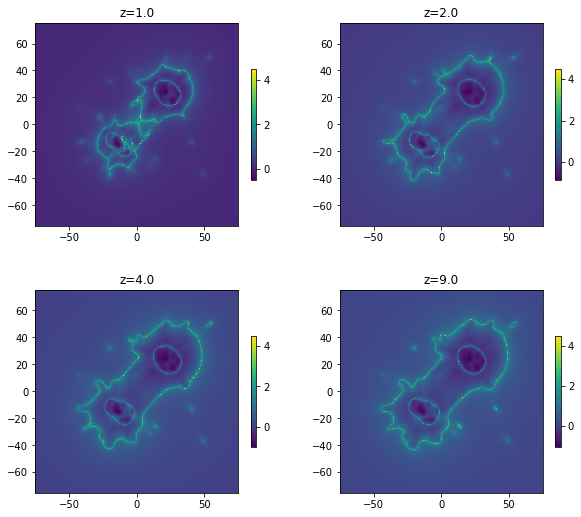

In [25]:
fig = plt.figure(figsize=(10,9))

ax = fig.add_subplot(221)
plotdensity(PY,PX,Z1,'z=1.0')

ax = fig.add_subplot(222)
plotdensity(PY,PX,Z2,'z=2.0')

ax = fig.add_subplot(223) 
plotdensity(PY,PX,Z4,'z=4.0')

ax = fig.add_subplot(224)
plotdensity(PY,PX,Z9,'z=9.0')

plt.show()

In [26]:
tag, x, y, b = np.loadtxt('/Users/agnivaghosh/Downloads/Lensing/graleruns/Irtysh/data_Irtysh/IrtyshII/parameters/lenses_IrtyshII.dat',unpack=True)

q = np.full(len(x), 1.0)
s = np.full(len(x),3.0)
K2 = np.zeros(len(x))
alpha = np.full(len(x),0.45)

alpha[0]=alpha[1]=0.6
K2[0]=-0.25
K2[1]=0.35

In [27]:
px = np.linspace(-75,75,451)
py = np.linspace(-75,75,451)

kappa = np.zeros([len(px),len(py)])
gamma1 = np.zeros([len(px),len(py)])
gamma2 = np.zeros([len(px),len(py)])

lens = Irtysh()

for i in range(len(px)):
    for j in range(len(py)):
        kappa[i][j] = 0.5*np.sum(lens.gradxx(x-px[i],y-py[j],b,alpha,s,q,K2)+lens.gradyy(x-px[i],y-py[j],b,alpha,s,q,K2))
        gamma1[i][j] = 0.5*np.sum(lens.gradxx(x-px[i],y-py[j],b,alpha,s,q,K2)-lens.gradyy(x-px[i],y-py[j],b,alpha,s,q,K2))
        gamma2[i][j] = np.sum(lens.gradxy(x-px[i],y-py[j],b,alpha,s,q,K2))

In [28]:
gamma=(gamma1*gamma1+gamma2*gamma2)**0.5

scrit0=0.313924 #critical density at infinite redshift

scale=scrit0/scrit[0]
mu1=((1-scale*kappa+scale*gamma)*(1-scale*kappa-scale*gamma))**(-1)
scale=scrit0/scrit[1]
mu2=((1-scale*kappa+scale*gamma)*(1-scale*kappa-scale*gamma))**(-1)
scale=scrit0/scrit[2]
mu4=((1-scale*kappa+scale*gamma)*(1-scale*kappa-scale*gamma))**(-1)
scale=scrit0/scrit[3]
mu9=((1-scale*kappa+scale*gamma)*(1-scale*kappa-scale*gamma))**(-1)


logmu1=np.log10(abs(mu1))
logmu2=np.log10(abs(mu2))
logmu4=np.log10(abs(mu4))
logmu9=np.log10(abs(mu9))

In [29]:
PX, PY = np.meshgrid(px,py)
Z1 = logmu1.reshape(len(px),len(py))
Z2 = logmu2.reshape(len(px),len(py))
Z4 = logmu4.reshape(len(px),len(py))
Z9 = logmu9.reshape(len(px),len(py))

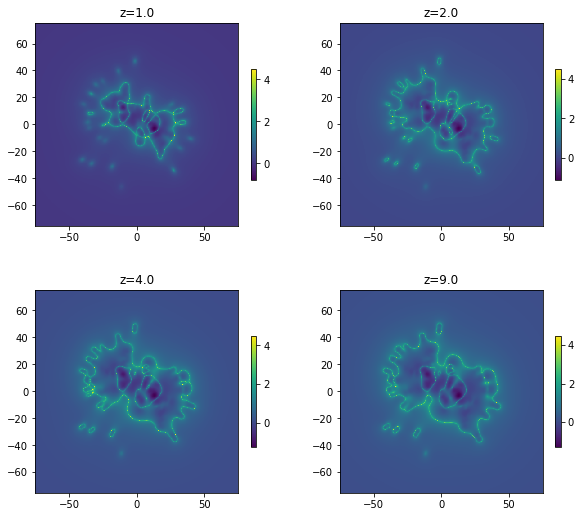

In [30]:
fig = plt.figure(figsize=(10,9))

ax = fig.add_subplot(221)
plotdensity(PY,PX,Z1,'z=1.0')

ax = fig.add_subplot(222)
plotdensity(PY,PX,Z2,'z=2.0')

ax = fig.add_subplot(223) 
plotdensity(PY,PX,Z4,'z=4.0')

ax = fig.add_subplot(224)
plotdensity(PY,PX,Z9,'z=9.0')

plt.show()

In [54]:
mu=1/mu4
Z = mu.reshape(len(px),len(py))

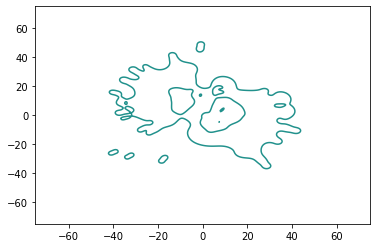

In [61]:
plt.contour(PY,PX,Z,0)
# plt.colorbar()